# Tutorial de RISE - parte 3
> Aspectos avanzados para hacer presentaciones interactivas con jupyter notebooks

- featured: false
- hide: false
- toc: true
- badges: true
- comments: true
- categories: [jupyter, rise]
- image: images/preview/rise.gif
- permalink: /tutorial-rise-3/

Esta es la parte 3 de 3 del [tutorial de presentaciones interactivas en jupyter notebook](https://sebastiandres.github.io/blog/tutorial-rise/).

## ¿Cómo puedo configurar texto y columnas?

Como las celdas de markdown aceptan html, es posible usar todos sus trucos. Uno de éstos permite generar dos columnas, típicamente para tener una columna con texto y otra con una imagen (estática o gif).

Por ejemplo, el siguiente código en html se puede usar en celdas de markdown

```html
<div>
    <div style="display: inline-block;  width: 40%;">
Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
    </div>
    <div style="display: inline-block; vertical-align: text-top; width: 50%;">
    <img src="2021-08-03-tutorial-rise-parte-3/columnas.gif" alt="LoreIpsum">
    </div>
</div>
```

y proporciona la siguiente imagen:
![](2021-08-03-tutorial-rise-parte-3/2columns.gif)


Pero en general, hay que segur el consejo: **keep it simple**. 

Gastar 1 hora en una slide de 1 minuto es una mala inversión.

## Convierte tus presentaciones automáticamente

Uno de los primeros desafíos para comenzar a usar notebook + rise es convertir el contenido de las presentaciones que ya están en powerpoint. Para solucionar eso, creé un sitio que permite convertir una presentación powerpoint a jupyter notebook + rise de manera automática. Ya genera texto e imagen a 2 columnas, como es el caso habitual en diapositivas. No es perfecto, pero te ahorrará un buen tiempo de copiar y pegar texto.

La aplicación para convertir se encuentra en este enlace: [pptx a rise](https://sebastiandres.github.io/streamlit_ppt2rise/)

El funcionamiento es el siguiente. Supongamos que tienes una presentación que necesitas convertir: `simple.pptx`

![](2021-08-03-tutorial-rise-parte-3/original_pptx.gif)

Primero que nada, en el sitio debes cargar la presentación, esperar que se convierta y descargar el notebook + RISE equivalente:

![](2021-08-03-tutorial-rise-parte-3/ppt2rise.gif)

Después de descargar y descomprimir, al lanzar el notebook en jupyter la presentación debería comenzar de inmediato: 

![](2021-08-03-tutorial-rise-parte-3/slides_ipynb.gif)

Observación 1: El notebook que se obtiene es el punto de partida para editar la presentación. Puedes agregarle más contenido y código, y personalizar el diseño tanto como desees.

Observación 2: Si no lo has hecho antes, deberás instalar jupyter notebook y RISE, obviamente.

## Ocultando código

A veces quieres ejecutar una celda pero no mostrar largas filas de código.

Hay 2 formas de hacerlo:
1. Simple: creando función auxiliar y ejecutándola.
2. No tan simple: usando un poco de magia de jupyter notebook.

**Opción Simple**: 

Podemos definir la función en un archivo, y luego importarla y ejecutarla:

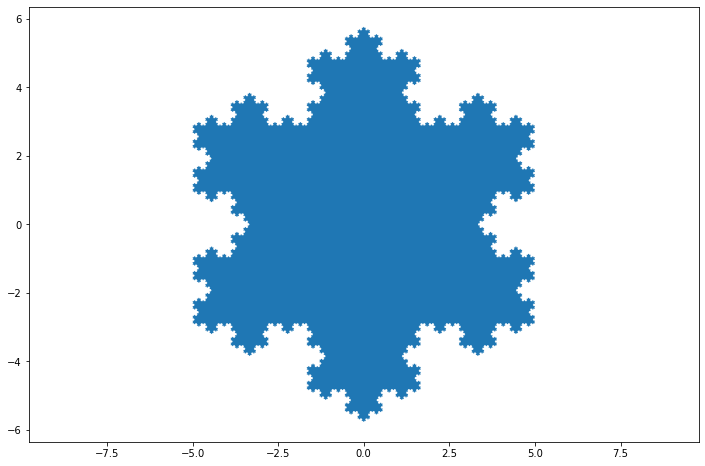

In [2]:
from mi_carpeta import mi_script
mi_script.mi_grafico(order=6, figsize=(12,8))

**Opción 2**: 

Usando una función específica para ocultar código, creada con una mezcla de html y javascript.

In [3]:
def toggle_cell_code(button_id):
    """
    Adds a button to toggle (show/hide) the code cell but not the output. 
    
    Parameters
    ----------
    button_id : str
        An identifier for cells that will hide/show when button is pressed.
    """
    
    from IPython.display import display_html
    my_html = '''
    <button type="button" id="%s" onclick="code_toggle('%s')">Codigo</button>
    <script>
    function code_toggle(my_id) {
        // get the parent element for the cell code and output
        var p = $("#"+my_id);
        if (p.length==0) return;
        while (!p.hasClass("cell")) {
            p = p.parent();
            if (p.prop("tagName") =="body") return;
        }
    // get the cell code and toggle its value
    var cell_code = p.find(".input");
    cell_code.toggle();
    }
    </script>
    ''' %(button_id, button_id)
    return display_html(my_html, raw=True)

Y así se ve en el código:

Codigo

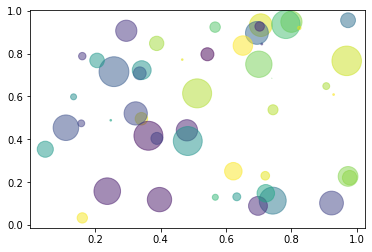

In [4]:
# Botón para esconder el código
toggle_cell_code("un_string_unico_y_reconocible")

# Código para graficar
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

Así se ve:
![](2021-08-03-tutorial-rise-parte-3/toggle.gif)

In [29]:
hide_code()
print("Hmmm444")

886216a64d679f3b


Hmmm444


## ¿Cómo puedo hacer actividades interactivas?

Para incluir actividades interactivas, como las que se pueden hacer con https://www.mentimeter.com/, https://kahoot.com/ o https://quizizz.com/ (entre otros), es posible tomar varios caminos.

Lo más simple es incluir una diapositiva con el enlace al que tiene que acceder los usuarios, idealmente con un código QR para facilitar el acceso desde smartphones. Luego simplemente te cambias a la página correspondiente para mirar los resultados y compartirlos en pantalla. 

Otra opción es no salir del jupyter notebook e incrustar la página web de los resultados. Para eso, es posible usar `IFrames` en una celda de código. De esa manera, es posible embeber dentro del notebook y una diapositiva una página web con una actividad.

In [6]:
from IPython.display import IFrame
IFrame("https://es.wikipedia.org/wiki/Iframe", width=600, height=450)

**Importante**: 
* Comparte un enlace y código QR del url al que debe acceder tu audiencia. 
* En una diapositiva, mediante IFrame, muestra lo que tu audiencia debería ver en sus celulares o computadores. 
* En otra diapositiva, mediante otro IFrame, coloca el resultado de la actividad interactiva que debería irse completando a medida que la gente responda. 

Ahora bien, puede suceder que la página que desees incrustar con IFrames no lo permita, así que siempre realiza pruebas antes de tu presentación.

## ¿Cómo hacer encuestas?
Es muy importante recibir retroalimentación de la presentación para poder mejorar. 

Recomiendo hacer 3 preguntas simples al finalizar toda presentación:
* ¿Qué te pareció la charla? Evaluar de 1 a 5.
* ¿Qué le agregarías a la charla?
* ¿Qué le sacaríias a la charla?

Esto puedes lograrlo embebiendo una encuesta de Google Forms, Microsoft Forms u otros mediante un IFrame.

In [11]:
# Encuesta
from IPython.display import IFrame
IFrame("https://forms.office.com/Pages/ResponsePage.aspx?id=zu7OdUTRPU-clJ5rQCX8_4qs5cX1Y7dFhVdiCz848sBUOTVJWktZQlBVNVJDNTg4OVA1N1JaMVlSNS4u", 
       width=450, height=600)

## Usa un teclado inalámbrico

En charlas y clases resulta cómodo tener un teclado y mouse inalámbrico. Esto permite que no tengas que estar cerca del notebook, de esa manera puedas moverte libremente por el escenario.

Resulta práctico también para crear la posibilidad que un asistente de la charla pueda editar una celda de código. ¡Esto es especialmente entretenido en una clase!